수집(크롤링), 전처리(Dataframe), 시각화 

import urllib.request   # 이 방법은 객체를 가져올 것으로 정하여 2번 일을 해야함 

html=urllib.request.urlopen('http://www.weather.go.kr/weather/observation/currentweather.jsp')

In [93]:
#html.read() 혹은 다른 방법으로 url  바로가져 올 수 있음 

import requests
from bs4  import BeautifulSoup

response = requests.get('http://www.weather.go.kr/weather/observation/currentweather.jsp') 
response     #response에서는 성공여부와 content라는 변수(속성) 존재로, 가져온 html

<Response [200]>

웹: 숫자,영어로 되어 있음(Encoding)
숫자로 된 글씨가 한글로 변경되는 것을 (Decoding)


가져오기 성공 : 200 리턴 , 실패:(404 오타) (500 서버오류)

In [94]:
soup= BeautifulSoup(response.content, 'html.parser')
soup.find("table" , {"class":"table_develop3"})

<table class="table_develop3" summary="기상실황표로 지점, 날씨, 기온, 강수, 바람, 기압등을 안내한 표입니다.">
<caption>기상실황표</caption>
<colgroup>
<col style="width:14%"/>
<col style="width:12%"/>
<col style="width:7%"/>
<col style="width:5%"/>
<col style="width:8%"/>
<col style="width:5%"/>
<col style="width:6%"/>
<col style="width:5%"/>
<col style="width:8%"/>
<col style="width:5%"/>
<col style="width:5%"/>
<col style="width:8%"/>
<col style="width:6%"/>
<col/>
</colgroup>
<thead>
<tr class="table_header" id="table_header1">
<th class="top_line" rowspan="2" scope="col">
		지점
		</th>
<th class="top_line" colspan="4" id="headers-weather" scope="col">날씨</th>
<th class="top_line" colspan="3" id="headers-temp" scope="col">기온(℃)</th>
<th class="top_line" colspan="3" id="headers-rain" scope="col">강수</th>
<th class="top_line" colspan="2" id="headers-wind" scope="col">바람</th>
<th class="top_line" id="headers-press" scope="col">기압(hPa)</th>
</tr>
<tr class="table_header" id="table_header2">
<th class="nm" headers="header

In [95]:
#table.findAll("tr")

for tr in table.find_all("tr"):
    tds - list(tr.find_all('td'))

for tr in table.find_all("tr"):
    tds = tr.find_all("td")
    if len(tds) > 0 :
        print("tds[0].text(지점)=", tds[0].text)
        print("tds[5].text(온도)=", tds[5].text)
        print("tds[10].text(습도)=", tds[10].text)
        print("="*50)
        
    #print("tds =", tds)
    #print("tds.find('a')=" , tds.find('a'))
   

In [107]:
table =soup.find("table" , {"class":"table_develop3"})

In [108]:
data =[]
for tr in table.findAll('tr'):
    tds = list(tr.findAll('td'))

In [109]:
for td in tds:
    if td.find('a'):
        point = td.find('a').text   # a는 지역을 포함하고 있음  text는 사진상과 보이는 것 같이 "경주"를 보여준다.
        temp = tds[5].text          #html에서 보이는 것같이 인덱스 넘버를 확인 할 수 있음. 
        hum=tds[10].text
        data.append([point, temp, hum])

In [115]:
data = []
for tr in table.find_all("tr"):
    tds = tr.find_all("td")
    if len(tds) > 0:
        data.append([tds[0].text.strip(), 
                         tds[5].text.strip(), 
                         tds[10].text.strip()])

In [116]:
data

[['강릉', '23.6', '18'],
 ['강진군', '23.1', '39'],
 ['강화', '12.9', '83'],
 ['거제', '21.3', '54'],
 ['거창', '22.3', '22'],
 ['경주시', '24.0', '28'],
 ['고산', '20.2', '81'],
 ['고창', '20.7', '35'],
 ['고창군', '20.4', '32'],
 ['고흥', '22.0', '44'],
 ['광양시', '23.1', '44'],
 ['광주', '22.1', '31'],
 ['구미', '22.3', '22'],
 ['군산', '17.7', '71'],
 ['금산', '19.4', '34'],
 ['김해시', '23.0', '52'],
 ['남원', '21.6', '33'],
 ['남해', '21.7', '51'],
 ['대관령', '15.7', '27'],
 ['대구', '23.8', '41'],
 ['대전', '20.3', '38'],
 ['동두천', '17.5', '59'],
 ['동해', '20.7', '30'],
 ['목포', '18.0', '73'],
 ['문경', '19.6', '31'],
 ['밀양', '23.1', '29'],
 ['백령도', '15.7', '55'],
 ['보령', '14.3', '81'],
 ['보성군', '21.8', '58'],
 ['보은', '19.1', '37'],
 ['봉화', '16.8', '27'],
 ['부산', '19.5', '68'],
 ['부안', '17.2', '74'],
 ['부여', '19.1', '48'],
 ['북강릉', '22.3', '14'],
 ['북창원', '23.6', '38'],
 ['북춘천', '18.5', '41'],
 ['산청', '23.3', '26'],
 ['상주', '20.6', '34'],
 ['서귀포', '19.3', '83'],
 ['서산', '17.3', '59'],
 ['서울', '17.3', '56'],
 ['성산', '20.8', '55']

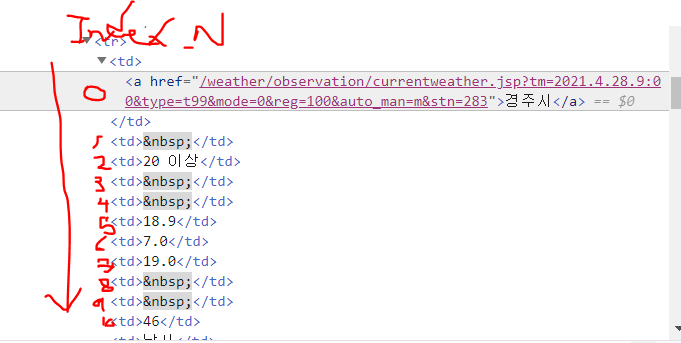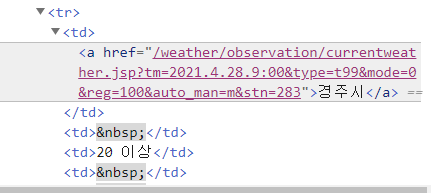

for tr in table.findAll('tr'):
    tds=list(tr.findAll('td'))
    for td in tds:
        if td.find('a'):
            point = td.find('a').text
            temp = tds[5].text
            hum=tds[10].text 
            data.append([point, temp, hum])
        

In [117]:
with open("weather.csv", "w") as file:
    file.write("point, temp, hum\n")
    for item in data:
        file.write('{0},{1},{2}\n'.format(*item))

In [118]:

for item in data:
        #print("item=", item)
        row = ",".join(item)#리스트에서 데이터 하나씩 꺼내서 문자열 하나로 만들어 줌 
        print (row)

강릉,23.6,18
강진군,23.1,39
강화,12.9,83
거제,21.3,54
거창,22.3,22
경주시,24.0,28
고산,20.2,81
고창,20.7,35
고창군,20.4,32
고흥,22.0,44
광양시,23.1,44
광주,22.1,31
구미,22.3,22
군산,17.7,71
금산,19.4,34
김해시,23.0,52
남원,21.6,33
남해,21.7,51
대관령,15.7,27
대구,23.8,41
대전,20.3,38
동두천,17.5,59
동해,20.7,30
목포,18.0,73
문경,19.6,31
밀양,23.1,29
백령도,15.7,55
보령,14.3,81
보성군,21.8,58
보은,19.1,37
봉화,16.8,27
부산,19.5,68
부안,17.2,74
부여,19.1,48
북강릉,22.3,14
북창원,23.6,38
북춘천,18.5,41
산청,23.3,26
상주,20.6,34
서귀포,19.3,83
서산,17.3,59
서울,17.3,56
성산,20.8,55
세종,18.3,40
속초,22.3,20
수원,18.5,54
순창군,22.0,24
순천,22.9,32
안동,20.4,27
양산시,23.9,49
양평,20.2,38
여수,20.7,57
영광군,20.3,28
영덕,22.0,25
영월,19.5,34
영주,18.6,32
영천,23.0,23
완도,22.1,56
울릉도,23.9,57
울산,22.5,46
울진,22.8,21
원주,19.5,32
의령군,24.2,35
의성,21.7,29
이천,21.2,34
인제,18.2,30
인천,13.3,70
임실,20.1,30
장수,19.5,23
장흥,23.5,37
전주,19.9,39
정선군,20.9,15
정읍,19.9,36
제주,19.1,72
제천,19.0,28
진도군,21.0,64
진주,23.1,41
창원,22.7,44
천안,18.4,40
철원,17.5,40
청송군,21.7,9
청주,19.0,39
추풍령,18.8,25
춘천,18.9,37
충주,19.4,38
태백,16.5,28
통영,18.8,79
파주,15.4,71
포항,23.7,28
